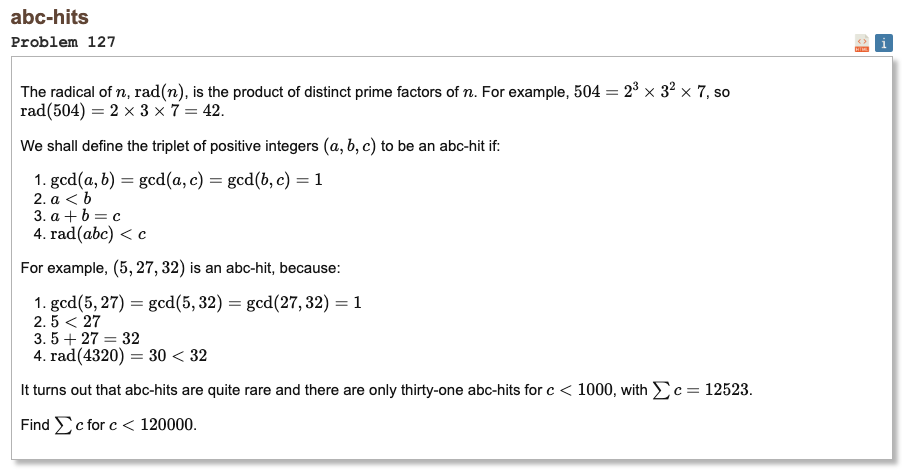

## Initial approach

* abc-hit is when, a<b, a+b=c, gcd(a,b)=gcd(a,c)=gcd(b,c)=1, rad(abc)<c
* rad(n) means the product of distinct prime factors of n
* precompute rad(n) for all n ≤ 120000 using a sieve method
* loop through c from 1 to 120000
* for each c, loop through possible a values from 1 to c//2, and compute b = c - a
* 

```python
from math import gcd
from functools import reduce
from itertools import combinations

LIMIT = 120000

def compute_rads(limit):
    rads = [1] * (limit + 1)
    for i in range(2, limit + 1):
        if rads[i] == 1:
            for j in range(i, limit + 1, i):
                rads[j] *= i
    return rads

rads = compute_rads(LIMIT)
total = 0

for c in range(1, LIMIT):
    for a in range(1, c // 2 + 1):
        b = c - a
        if gcd(a, b) != 1:
            continue
        rad_abc = rads[a] * rads[b] * rads[c]
        if rad_abc < c:
            total += c
```

* it's simple and too slow.
* optimization is needed.

* instead of checking every possible a, sort all numbers by their rad(n) value
* stop checking a as soon as a >= c/2. this avoids checking unnecessary values where a >= b
* store (rad(n), n) pairs in advance and reuse them, instead of recalculating or indexing rad in every loop

In [1]:
from math import gcd

LIMIT = 120000

rad = [1] * (LIMIT + 1)
for i in range(2, LIMIT + 1):
    if rad[i] == 1:
        for j in range(i, LIMIT + 1, i):
            rad[j] *= i

indexed = sorted([(r, n) for n, r in enumerate(rad)])

total = 0
for c in range(1, LIMIT):
    rad_c = rad[c]
    for rad_a, a in indexed:
        if a >= c // 2:
            break
        b = c - a
        if gcd(a, b) != 1:
            continue
        if rad_a * rad[b] * rad_c < c:
            total += c

print("Result:", total)

Result: 4186975
